In [1]:
#lIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import csv 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
#DATASET

df = pd.read_csv("walmart_datasets.csv")

In [3]:
#CHECKING THE DATASET

df.head()

,url,name,sku,brand,gtin13,description,product_id,availability,currency,price,...,reviews_count,product_details,specifications,5_stars,4_stars,3_stars,2_stars,1_star,uniq_id,scraped_at
0,https://www.walmart.com/ip/Terra-Sky-Women-s-P...,Terra & Sky Women's Plus Size Pull-On Drawstri...,166788467,Terra & Sky,8.401898e+11,short description is not available,NaN,InStock,USD,14.98,...,11.0,NaN,"[{'name': 'Clothing Size', 'value': '4X'}, {'n...",9,1,0,1,0,6f351372-10de-506a-91ec-9f1f5202adcc,28/01/2023 13:32:02
1,https://www.walmart.com/ip/Camo-Crme-Tube-Make...,"Camo Crme Tube Makeup, Hunters Specialti",54739245,ONLINE,2.129100e+10,Hunters Specialties Crème Tube Makeup (Mud Bro...,NaN,OutOfStock,USD,1.87,...,NaN,NaN,"[{'name': 'Brand', 'value': 'ONLINE'}, {'name'...",0,0,0,0,0,74f8db6d-7cb4-501b-bb29-1a7e4b2bb352,28/01/2023 13:32:03
2,https://www.walmart.com/ip/Berkley-Lightning-S...,Berkley Lightning Spinning Rod,33607364,Berkley,2.863255e+10,This is North America's number one selling gra...,NaN,OutOfStock,USD,39.30,...,123.0,NaN,"[{'name': 'Brand', 'value': 'Berkley'}, {'name...",95,14,1,4,9,fbdee5b7-b822-589e-9b1e-90af93934af2,28/01/2023 13:32:07
3,https://www.walmart.com/ip/Designart-Cherry-Bl...,Designart 'Cherry Blossom Flowers In Glass Jar...,955364422,Designart,7.599514e+11,"""This exquisite Cherry Blossom In Glass Jar Fr...",NaN,InStock,USD,41.69,...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0,96844bcf-0e92-56bc-9d49-6530b7f49997,28/01/2023 13:32:11
4,https://www.walmart.com/ip/Ashgate-Studies-in-...,Ashgate Studies in Medieval Philosophy: Ockham...,693652184,Claude Panaccio; Scott MacDonald; Christopher ...,NaN,William of Ockham (c.1287-1347) is known to be...,NaN,OutOfStock,USD,212.15,...,NaN,NaN,"[{'name': 'Language', 'value': 'English'}, {'n...",0,0,0,0,0,7d0cf2b0-878c-533b-bc35-f1be74c7b9e1,28/01/2023 13:32:24


In [4]:
#AVAILABLE ATTRIBUTES

list(df)

['url',
 'name',
 'sku',
 'brand',
 'gtin13',
 'description',
 'product_id',
 'availability',
 'currency',
 'price',
 'images',
 'avg_rating',
 'reviews_count',
 'product_details',
 'specifications',
 '5_stars',
 '4_stars',
 '3_stars',
 '2_stars',
 '1_star',
 'uniq_id',
 'scraped_at']

In [5]:
df.currency.unique()

array(['USD', nan], dtype=object)

In [6]:
df.name .unique()

array(["Terra & Sky Women's Plus Size Pull-On Drawstring Linen Shorts",
       'Camo Crme Tube Makeup, Hunters Specialti',
       'Berkley Lightning Spinning Rod', ...,
       'The Outward Appearance of the Horse as Indicating Value - Containing Extracts from Livestock for the Farmer and Stock Owner (Paperback)',
       'Nearly Natural 5.5" Sweet Bay Double Ball Artificial Topiary, Green',
       'Stock Market Investing for Beginners: Options and Day Trading for Beginners : The Complete Crash Course to Learn the Bases of Stock Market Investing with 7 Profitable Strategies in less than 30 days! Build your Passive Income for a Living by Growing your Money Management skills (Series #2) (Paperback)'],
      dtype=object)

In [7]:
#REMOVING UNNECESSARY ATTRIBUTES

newdf = df.drop(["sku","gtin13","product_id","currency","uniq_id","scraped_at"], axis = 1)

In [8]:
#CHECKING FOR NULL VALUES

newdf.isnull().sum()

url                   0
name                  0
brand                27
description           4
availability          0
price                 4
images                1
avg_rating          781
reviews_count       781
product_details    1055
specifications       20
5_stars               0
4_stars               0
3_stars               0
2_stars               0
1_star                0
dtype: int64

In [9]:
len(df)

1056

In [10]:
df.loc[df["product_details"].notnull()]

,url,name,sku,brand,gtin13,description,product_id,availability,currency,price,...,reviews_count,product_details,specifications,5_stars,4_stars,3_stars,2_stars,1_star,uniq_id,scraped_at
137,https://www.walmart.com/ip/Cubic-Zirconia-Moun...,Cubic Zirconia Mounted In Sterling Silver Deli...,381904381,TwoBirch,7.231852e+11,Delicate Traditional Style Contoured Ring Guar...,NaN,OutOfStock,USD,69.0,...,NaN,Delicate Traditional Style Contoured Ring Guar...,"[{'name': 'Gender', 'value': 'Female'}, {'name...",0,0,0,0,0,a9164546-e535-5563-8b42-6309f9afa1c7,28/01/2023 13:48:36


In [11]:
#CLEANING DATASET

newdf = newdf.drop(["product_details"], axis = 1)

In [12]:
list(newdf)

['url',
 'name',
 'brand',
 'description',
 'availability',
 'price',
 'images',
 'avg_rating',
 'reviews_count',
 'specifications',
 '5_stars',
 '4_stars',
 '3_stars',
 '2_stars',
 '1_star']

In [13]:
x1 = newdf["5_stars"]
x2 = newdf["4_stars"]
x3 = newdf["3_stars"]
x4 = newdf["2_stars"]
x5 = newdf["1_star"]

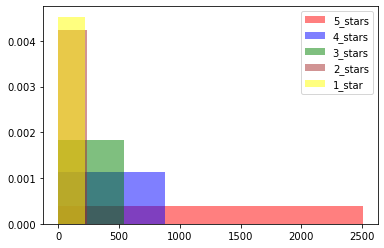

In [14]:
#REVIEWING DATA

kwargs = dict(alpha=0.5, bins=1, density=True, stacked=False)
plt.hist(x1,**kwargs,histtype='stepfilled',color='red',label='5_stars')
plt.hist(x2,**kwargs,histtype='stepfilled',color='blue',label='4_stars')
plt.hist(x3,**kwargs,histtype='stepfilled',color='green',label='3_stars')
plt.hist(x4,**kwargs,histtype='stepfilled',color='brown',label='2_stars')
plt.hist(x5,**kwargs,histtype='stepfilled',color='yellow',label='1_star')
plt.legend()

Text(0, 0.5, 'Number of ratings')

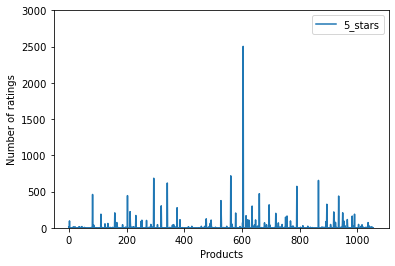

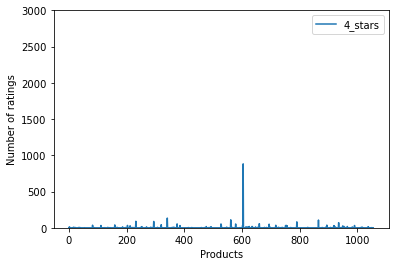

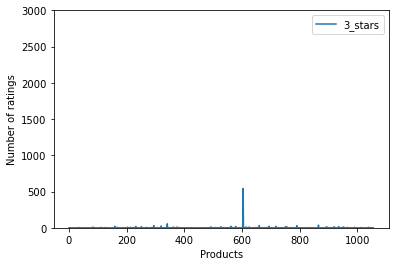

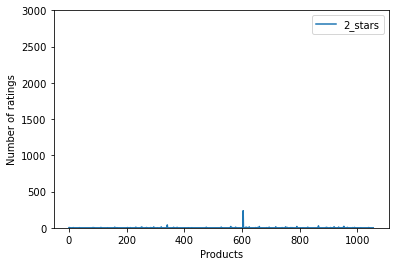

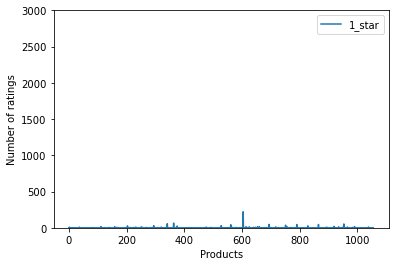

In [15]:
#REVIEWING DATA

df.plot(y=["5_stars"],kind='line',ylim = (0,3000),stacked=True)
plt.xlabel('Products')
plt.ylabel('Number of ratings')
df.plot(y=["4_stars"],kind='line',ylim = (0,3000),stacked=True)
plt.xlabel('Products')
plt.ylabel('Number of ratings')
df.plot(y=["3_stars"],kind='line',ylim = (0,3000),stacked=True)
plt.xlabel('Products')
plt.ylabel('Number of ratings')
df.plot(y=["2_stars"],kind='line',ylim = (0,3000),stacked=True)
plt.xlabel('Products')
plt.ylabel('Number of ratings')
df.plot(y=["1_star"],kind='line',ylim = (0,3000),stacked=True)
plt.xlabel('Products')
plt.ylabel('Number of ratings')

In [16]:
newdf.specifications[3]

"[{'name': 'Country of Origin - Textiles', 'value': 'Imported'}, {'name': 'Brand', 'value': 'Designart'}, {'name': 'Color', 'value': 'Blue'}, {'name': 'Size', 'value': '12 x 20'}, {'name': 'Assembled Product Weight', 'value': '3 lb'}, {'name': 'Material', 'value': 'Canvas, Wood, Ink'}, {'name': 'Framed', 'value': 'Y'}, {'name': 'Frame Color', 'value': 'Gold'}, {'name': 'Recommended Room', 'value': 'Living Room'}, {'name': 'Assembled Product Dimensions (L x W x H)', 'value': '20.00 x 12.00 x 1.00 Inches'}]"

In [17]:
type(newdf.specifications[3])

str

In [18]:
#Extract all the textiles

textile_list = []
i = 0
while(i<1056):
    txt = str(newdf.specifications[i])
    res = re.search("Country of Origin - Textiles", txt)
    if res:
        textile_list.append(i)
    
    i = i+1

In [19]:
tex_df = newdf.iloc[textile_list,:]
tex_df = tex_df.set_index(pd.Index(range(0,156)))

In [20]:
tex_df

,url,name,brand,description,availability,price,images,avg_rating,reviews_count,specifications,5_stars,4_stars,3_stars,2_stars,1_star
0,https://www.walmart.com/ip/Designart-Cherry-Bl...,Designart 'Cherry Blossom Flowers In Glass Jar...,Designart,"""This exquisite Cherry Blossom In Glass Jar Fr...",InStock,41.69,https://i5.walmartimages.com/asr/c9f2dbe3-f325...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
1,https://www.walmart.com/ip/Designart-Abstract-...,Designart ' Abstract Yelllow Red Beige and Pin...,Designart,This exquisite Modern Canvas Art brings beauty...,InStock,45.00,https://i5.walmartimages.com/asr/4f837ec8-a4e4...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
2,https://www.walmart.com/ip/Joseph-S-Giacalone-...,Joseph S Giacalone 'The Most Colorful Harbor' ...,Trademark Fine Art,Artist: Joseph S GiacaloneSubject: CityscapeSt...,InStock,64.95,https://i5.walmartimages.com/asr/590f7c49-b27b...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
3,https://www.walmart.com/ip/Sebastian-Alexander...,Sebastian Alexander Stamatis 'Embryo' Canvas Art,Trademark Fine Art,Artist: Sebastian Alexander StamatisSubject: S...,InStock,69.95,https://i5.walmartimages.com/asr/fb2ff3b8-449b...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
4,https://www.walmart.com/ip/Golf-Themed-Father-...,Golf-Themed Father's Day 2-Pack Adult Mens Box...,Bioworld,Give Dad the gift of comfort this Father's Day...,InStock,13.33,https://i5.walmartimages.com/asr/ad6f4c18-8fb2...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,https://www.walmart.com/ip/RugSmith-Natural-Ma...,"RugSmith Natural Machine Tufted Hand Shake, 18...",Rugsmith,<p>Make your home more inviting with our print...,InStock,12.29,https://i5.walmartimages.com/asr/597a6172-a99e...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
152,https://www.walmart.com/ip/Designart-Chinoiser...,Designart 'Chinoiserie With Peonies and Birds ...,Designart,"""This exquisite Chinoiserie With Birds and Peo...",InStock,83.71,https://i5.walmartimages.com/asr/c9f2dbe3-f325...,NaN,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0
153,https://www.walmart.com/ip/Free-Assembly-Women...,Free Assembly Women's Strappy Swing Dress,Free Assembly,You’re in for a treat. Free Assembly’s Strappy...,OutOfStock,24.00,https://i5.walmartimages.com/asr/72a12696-c95a...,4.5,97.0,"[{'name': 'Country of Origin - Textiles', 'val...",72,15,3,1,6
154,https://www.walmart.com/ip/Savona-Luxe-Viscose...,"Savona Luxe Viscose Area Rug, High-low Pile, L...",Weave Wander,"In soothing solids, the Weave & Wander Savona ...",InStock,910.67,https://i5.walmartimages.com/asr/f080146f-d002...,NaN,NaN,"[{'name': 'Features', 'value': 'High/Low Pile,...",0,0,0,0,0


In [21]:
tex_df.specifications[0]

"[{'name': 'Country of Origin - Textiles', 'value': 'Imported'}, {'name': 'Brand', 'value': 'Designart'}, {'name': 'Color', 'value': 'Blue'}, {'name': 'Size', 'value': '12 x 20'}, {'name': 'Assembled Product Weight', 'value': '3 lb'}, {'name': 'Material', 'value': 'Canvas, Wood, Ink'}, {'name': 'Framed', 'value': 'Y'}, {'name': 'Frame Color', 'value': 'Gold'}, {'name': 'Recommended Room', 'value': 'Living Room'}, {'name': 'Assembled Product Dimensions (L x W x H)', 'value': '20.00 x 12.00 x 1.00 Inches'}]"

In [22]:
#Extracting data for applying machine learning algorithm

col = []
i = 0
while(i<156):
    txt = str(tex_df.specifications[i])
    col.append(re.findall("\'name\': \'Color\', \'value\': \'(.*)\'", txt))

    i = i+1

In [23]:
col_list = []
i = 0
while(i<156):
    txt = str(col[i])
    x = txt.split("'")
    res = x[0]
    col_list.append(res[2:])

    i = i+1

In [24]:
tex_df['Colour'] = col_list

In [25]:
tex_df.isnull().sum()

url                0
name               0
brand              0
description        0
availability       0
price              1
images             0
avg_rating        71
reviews_count     71
specifications     0
5_stars            0
4_stars            0
3_stars            0
2_stars            0
1_star             0
Colour             0
dtype: int64

In [26]:
tex_df_r = tex_df.dropna()

PREDICTING PRODUCT RATING BASED ON BRAND, PRICE, NUMBER OF REVIEWS, COLOUR

In [27]:
le = preprocessing.LabelEncoder()
tex_df_r["brand"] = le.fit_transform(tex_df_r["brand"])
tex_df_r["price"] = le.fit_transform(tex_df_r["price"])
tex_df_r["reviews_count"] = le.fit_transform(tex_df_r["reviews_count"])
tex_df_r["Colour"] = le.fit_transform(tex_df_r["Colour"])
tex_df_r["avg_rating"] = le.fit_transform(tex_df_r["avg_rating"])
X = tex_df_r[["brand", "price", "reviews_count", "Colour"]]
y = tex_df_r.avg_rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\saith\AppData\Local\Temp\ipykernel_17128\3904479865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tex_df_r["brand"] = le.fit_transform(tex_df_r["brand"])
C:\Users\saith\AppData\Local\Temp\ipykernel_17128\3904479865.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tex_df_r["price"] = le.fit_transform(tex_df_r["price"])
C:\Users\saith\AppData\Local\Temp\ipykernel_17128\3904479865.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [28]:
# LINEAR REGRESSION

regmodel = LinearRegression().fit(X, y)
print(regmodel.score(X,y)*100)

4.229881429706007


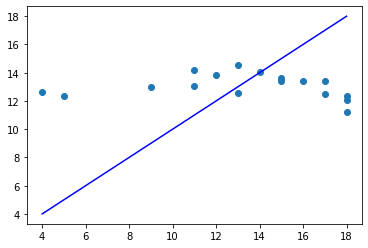

In [29]:
y_pred = regmodel.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [30]:
#LOGISTIC REGRESSION

log_reg = LogisticRegression()
log_reg = log_reg.fit(X,y)
print(log_reg.score(X,y)*100)

30.952380952380953


C:\Users\saith\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


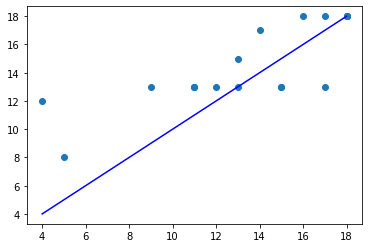

In [31]:
y_pred = log_reg.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [32]:
#NAIVE BAYES CLASSIFIER

nbmodel = GaussianNB()
nbmodel.fit(X_train,y_train)
print(nbmodel.score(X,y)*100)

32.142857142857146


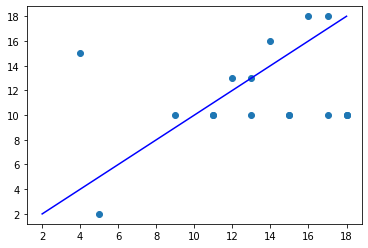

In [33]:
y_pred = nbmodel.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [34]:
#DECISION TREE CLASSIFIER

dtclf = DecisionTreeClassifier()
dtclf = dtclf.fit(X_train,y_train)
print(dtclf.score(X,y)*100)

82.14285714285714


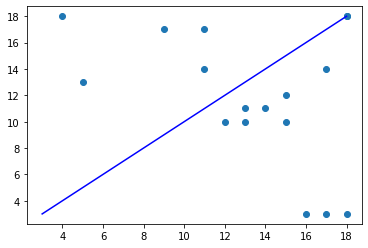

In [35]:
y_pred = dtclf.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [36]:
#SUPPORT VECTOR MACHINE

svmclf=svm.SVC()
svmclf.fit(X_train,y_train)
print(svmclf.score(X,y)*100)

38.095238095238095


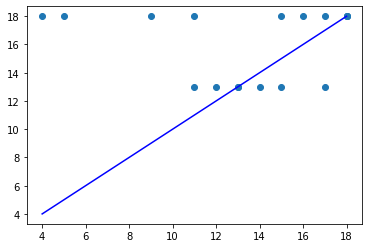

In [37]:
y_pred = svmclf.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [38]:
#KNN

knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
print(knn.score(X,y)*100)

42.857142857142854


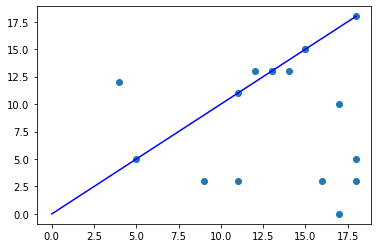

In [39]:
y_pred = knn.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

In [40]:
# MLP Classifier

clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clf.score(X,y)*100)

67.85714285714286


C:\Users\saith\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


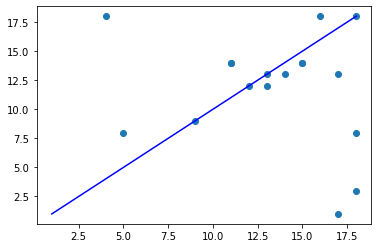

In [41]:
y_pred = clf.predict(X_test)
plt.scatter(y_test, y_pred)
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')

### Since Decision Tree has the highest accuracy of 83% which was tested on a small part of the dataset, it is now applied to the whole dataset 

In [42]:
finaldf = pd.DataFrame(newdf.dropna())

In [43]:
finaldf["brand"] = le.fit_transform(finaldf["brand"])
finaldf["price"] = le.fit_transform(finaldf["price"])
finaldf["reviews_count"] = le.fit_transform(finaldf["reviews_count"])
finaldf["avg_rating"] = le.fit_transform(finaldf["avg_rating"])
X = finaldf[["brand", "price", "reviews_count"]]
y = finaldf.avg_rating
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ACCURACY =  85.03937007874016


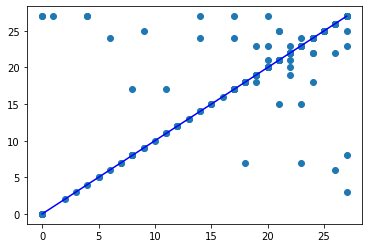

In [44]:
#DECISION TREE CLASSIFIER

dtclf = DecisionTreeClassifier()
dtclf = dtclf.fit(X_train,y_train)
print("ACCURACY = ", dtclf.score(X,y)*100)

y_pred = dtclf.predict(X)
plt.scatter(y, y_pred)
p1 = max(max(y_pred), max(y))
p2 = min(min(y_pred), min(y))
plt.plot([p1, p2], [p1, p2], 'b-')

In [45]:
newdf["brand"] = le.fit_transform(newdf["brand"])
newdf["price"] = le.fit_transform(newdf["price"])
newdf["reviews_count"] = le.fit_transform(newdf["reviews_count"])
newdf["avg_rating"] = le.fit_transform(newdf["avg_rating"])
fullx = newdf[["brand", "price", "reviews_count"]]
fuuly = newdf.avg_rating

In [46]:
Predicted_rating = dtclf.predict(fullx)
Predicted_rating = le.inverse_transform(Predicted_rating)

In [47]:
for i in Predicted_rating:
    print(i)

4.8
4.4
4.0
4.6
4.6
4.6
3.9
4.6
4.6
4.6
4.6
4.6
4.7
5.0
4.6
4.8
4.6
4.8
4.6
4.6
4.6
4.7
4.6
4.6
4.0
4.6
4.6
4.6
1.0
4.6
4.6
4.6
4.7
4.6
4.8
4.6
4.8
2.9
4.7
4.6
4.6
4.6
4.6
4.6
4.6
4.8
4.6
4.6
4.6
4.6
5.0
4.6
5.0
4.6
4.8
4.6
4.7
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.3
4.6
4.6
4.6
1.0
4.6
4.6
1.0
4.6
3.7
4.6
4.6
4.9
4.6
4.6
4.7
4.6
4.5
4.6
1.0
4.6
1.0
4.6
4.6
4.6
4.6
5.0
4.6
4.6
4.6
4.6
4.5
4.6
4.6
4.6
4.6
3.0
4.6
4.6
4.7
3.9
5.0
4.5
4.6
4.6
4.6
4.6
3.7
4.7
4.6
4.6
1.0
4.6
4.6
4.4
1.0
4.6
5.0
4.6
4.6
4.7
3.9
4.6
4.6
4.7
3.7
4.7
4.6
4.6
4.9
4.1
1.0
4.6
1.0
3.2
4.6
4.9
3.9
4.6
4.6
4.7
4.7
3.9
4.8
4.6
1.0
4.6
4.6
4.6
4.6
4.5
4.6
4.1
4.4
4.6
4.6
4.6
4.5
4.6
4.8
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.4
4.6
4.6
4.6
4.6
4.6
4.3
4.6
4.6
4.6
1.0
4.6
1.0
4.6
4.6
4.6
4.6
4.6
4.7
3.9
1.0
3.6
4.6
4.6
4.6
4.3
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.6
4.5
4.5
4.6
4.6
1.0
1.0
4.6
4.1
3.7
4.6
4.4
4.7
4.6
4.0
4.6
4.6
4.6
3.7
4.6
4.6
4.5
4.6
4.6
4.3
4.6
4.6
4.6
4.6
4.6
4.3
2.7
4.6
4.7
4.6
4.6
4.4
4.6
4.6


In [49]:
exc = pd.read_csv("walmart_datasets.csv")
exc['Predicted_Ratings'] = Predicted_rating
exc.to_csv('final.csv', index=False)

In [50]:
exc.head()

,url,name,sku,brand,gtin13,description,product_id,availability,currency,price,...,product_details,specifications,5_stars,4_stars,3_stars,2_stars,1_star,uniq_id,scraped_at,Predicted_Ratings
0,https://www.walmart.com/ip/Terra-Sky-Women-s-P...,Terra & Sky Women's Plus Size Pull-On Drawstri...,166788467,Terra & Sky,8.401898e+11,short description is not available,NaN,InStock,USD,14.98,...,NaN,"[{'name': 'Clothing Size', 'value': '4X'}, {'n...",9,1,0,1,0,6f351372-10de-506a-91ec-9f1f5202adcc,28/01/2023 13:32:02,4.8
1,https://www.walmart.com/ip/Camo-Crme-Tube-Make...,"Camo Crme Tube Makeup, Hunters Specialti",54739245,ONLINE,2.129100e+10,Hunters Specialties Crème Tube Makeup (Mud Bro...,NaN,OutOfStock,USD,1.87,...,NaN,"[{'name': 'Brand', 'value': 'ONLINE'}, {'name'...",0,0,0,0,0,74f8db6d-7cb4-501b-bb29-1a7e4b2bb352,28/01/2023 13:32:03,4.4
2,https://www.walmart.com/ip/Berkley-Lightning-S...,Berkley Lightning Spinning Rod,33607364,Berkley,2.863255e+10,This is North America's number one selling gra...,NaN,OutOfStock,USD,39.30,...,NaN,"[{'name': 'Brand', 'value': 'Berkley'}, {'name...",95,14,1,4,9,fbdee5b7-b822-589e-9b1e-90af93934af2,28/01/2023 13:32:07,4.0
3,https://www.walmart.com/ip/Designart-Cherry-Bl...,Designart 'Cherry Blossom Flowers In Glass Jar...,955364422,Designart,7.599514e+11,"""This exquisite Cherry Blossom In Glass Jar Fr...",NaN,InStock,USD,41.69,...,NaN,"[{'name': 'Country of Origin - Textiles', 'val...",0,0,0,0,0,96844bcf-0e92-56bc-9d49-6530b7f49997,28/01/2023 13:32:11,4.6
4,https://www.walmart.com/ip/Ashgate-Studies-in-...,Ashgate Studies in Medieval Philosophy: Ockham...,693652184,Claude Panaccio; Scott MacDonald; Christopher ...,NaN,William of Ockham (c.1287-1347) is known to be...,NaN,OutOfStock,USD,212.15,...,NaN,"[{'name': 'Language', 'value': 'English'}, {'n...",0,0,0,0,0,7d0cf2b0-878c-533b-bc35-f1be74c7b9e1,28/01/2023 13:32:24,4.6
